# Let's see which type of student likely to be admitted to a school

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Admission_Predict.csv')
df = df.rename(columns = {'Chance of Admit ': 'Chance of Admit'})
df.drop('Serial No.', axis = 1, inplace = True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
y = df['Chance of Admit'].values
X = df.drop(['Chance of Admit'], axis = 1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
# feature_range form 0 to 1
X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalerX.transform(X_test[X_test.columns])

/Users/tl/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/tl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/tl/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/tl/anaconda3/lib/p

# Using some Regression Algorithms

Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
a1 = lr.score(X_test, y_test)

Ridge Regression

In [7]:
from sklearn.linear_model import Ridge
ri = Ridge()
ri.fit(X_train, y_train)
a2 = ri.score(X_test, y_test)

Support Vector Regression

In [8]:
from sklearn.svm import SVR
sv = SVR()
sv.fit(X_train, y_train)
a3 = sv.score(X_test, y_test)

/Users/tl/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Random Forest Regressor

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
a4 = rf.score(X_test, y_test)

/Users/tl/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Decision Tree Regressor

In [10]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
a5 = dt.score(X_test, y_test)

Comparing these regression algorithms

<BarContainer object of 5 artists>

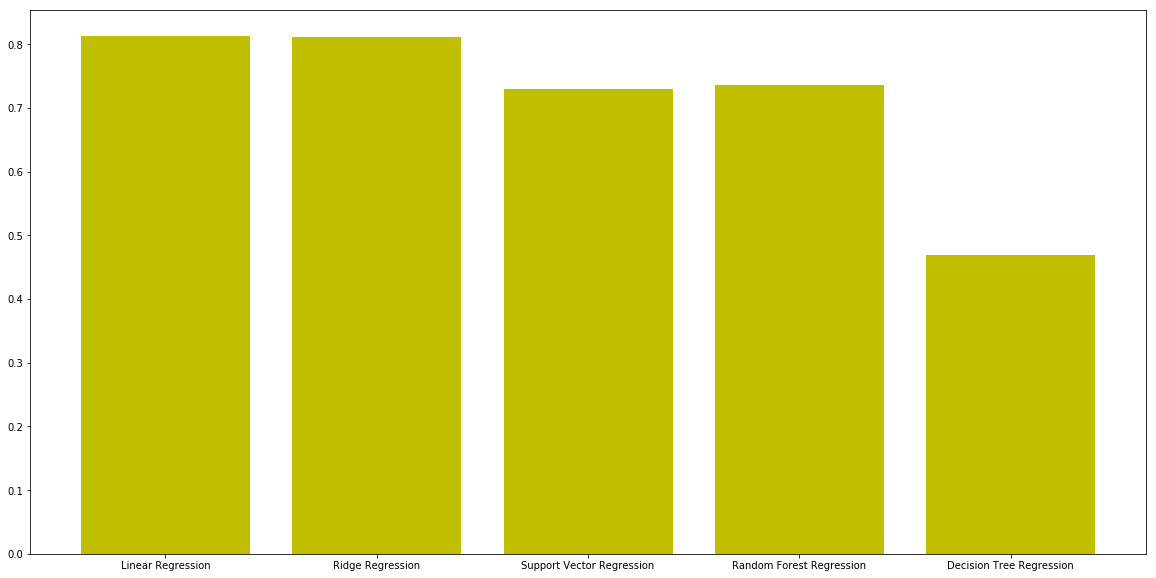

In [11]:
ax, fig = plt.subplots(figsize = (20, 10))
x = ['Linear Regression', 'Ridge Regression', 'Support Vector Regression',
     'Random Forest Regression', 'Decision Tree Regression']
y = np.array([a1, a2, a3, a4, a5])
plt.bar(x, y, color = 'y')